In [71]:
import time
import datetime
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd

from datetime import timedelta

from sklearn.svm import SVC
from sklearn import metrics
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RepeatedKFold

import matplotlib.pyplot as plt

In [72]:
data = pd.read_csv("cardio_train.csv")

In [73]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,output
0,0,18393,2,168,62,0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,0,100,60,1,1,0,0,0,0


In [74]:
data.shape

(70000, 14)

In [155]:
X=data[['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio']] 
y=data['output']

# X=data[['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio']] 
# y=data['output']

# The ISNULL() function returns a specified value if the expression is NULL. If the expression is NOT NULL, this function returns the expression.

In [156]:
data.isnull()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,output
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# While the chain of .isnull().values.any() will work for a DataFrame object to indicate if any value is missing, in some cases it may be useful to also count the number of missing values across the entire DataFrame.

In [157]:
data.isnull().values.any()

False

# In some cases, you may wish to determine how many missing values exist in the collection, in which case you can use .sum() chained on:

In [158]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
output         0
dtype: int64

# In order to get the total summation of all missing values in the DataFrame, we chain two .sum() methods together:

In [159]:
data.isnull().sum().sum()

0

# Random Forest

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [161]:
clf=RandomForestClassifier(n_estimators=100)

In [162]:
# a = datetime.datetime.now().replace(microsecond=0)
clf.fit(X_train,y_train)
# b = datetime.datetime.now().replace(microsecond=0)
# print(b-a)

RandomForestClassifier()

In [163]:
a = datetime.datetime.now()
y_pred=clf.predict(X_test)
b = datetime.datetime.now()
rf_time = (b-a)
rf_ac = metrics.accuracy_score(y_test, y_pred)
rf_run_time = rf_time / datetime.timedelta(microseconds=1)

print(type(rf_run_time))
print(rf_run_time)
print('Random Forest Time Duration - ',b-a)
print("Random Forest Accuracy:",metrics.accuracy_score(y_test, y_pred))

<class 'float'>
716087.0
Random Forest Time Duration -  0:00:00.716087
Random Forest Accuracy: 0.7159047619047619


In [164]:
# a = datetime.datetime.now()
# b = datetime.datetime.now()
# print(b-a)

# SVM

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y)

In [166]:
# Feature Scaling
 
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [167]:
# Training a SVM classifier using SVC class
svm = SVC(kernel= 'linear', random_state=1, C=0.1)
svm.fit(X_train_std, y_train)

SVC(C=0.1, kernel='linear', random_state=1)

In [168]:
# Mode performance
a = datetime.datetime.now()
y_pred = svm.predict(X_test_std)
b = datetime.datetime.now()

svm_ac = accuracy_score(y_test, y_pred)

svm_time = b-a
svm_time_run_time = svm_time / datetime.timedelta(microseconds=1)
print(svm_time_run_time)

# print(type(accuracy_score(y_test, y_pred)))
print('SVM Time Duration - ',b-a)
print('SVM Accuracy: %.3f' % accuracy_score(y_test, y_pred))

28615576.0
SVM Time Duration -  0:00:28.615576
SVM Accuracy: 0.724


# SVM SGDClassifier 

In [154]:
# Instantiate SVM classifier using SGDClassifier
svm = SGDClassifier(loss='hinge')
 
# Fit the model
svm.fit(X_train_std, y_train)
 
# Model Performance
a = datetime.datetime.now()
y_pred = svm.predict(X_test_std)
b = datetime.datetime.now()


sgdc_ac = accuracy_score(y_test, y_pred)

sgdc_time = b-a
sgdc_time_run_time = sgdc_time / datetime.timedelta(microseconds=1)
print(sgdc_time_run_time)

print(sgdc_ac)
print('SVM SGDClassifier - ',b-a)
print('SVM SGDClassifier Accuracy: %.3f' % accuracy_score(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [49000, 700]

# KNN.Model Evaluation for k=5

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [153]:
#Predict the response for test dataset
a = datetime.datetime.now()
y_pred = knn.predict(X_test)
b = datetime.datetime.now()

knn_five_time = b-a
knn_five_ac = metrics.accuracy_score(y_test, y_pred)



print(type(knn_five_ac))

knn_five_time = b-a
knn_five_time_run_time = knn_five_time / datetime.timedelta(microseconds=1)
print(knn_five_time_run_time)


print('KNN k=5 Time Duration- ',b-a)
print("KNN k=5 Accuracy:",metrics.accuracy_score(y_test, y_pred))

<class 'numpy.float64'>
17952.0
KNN k=5 Time Duration-  0:00:00.017952
KNN k=5 Accuracy: 0.8833333333333333


# KNN Re-generating Model for K=7

In [152]:
knn = KNeighborsClassifier(n_neighbors=7)
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

a = datetime.datetime.now()
y_pred = knn.predict(X_test)
b = datetime.datetime.now()

knn_seven_ac = metrics.accuracy_score(y_test, y_pred)

knn_seven_time = b-a
knn_seven_time_run_time = knn_seven_time / datetime.timedelta(microseconds=1)
print(knn_seven_time_run_time)


print('KNN k=7 Time Duration- ',b-a)
print("KNN k=7 Accuracy:",metrics.accuracy_score(y_test, y_pred))  

10939.0
KNN k=7 Time Duration-  0:00:00.010939
KNN k=7 Accuracy: 0.8833333333333333


# Gradient Boosting Machine for Classification using repeated k-fold cross-validation and reports the mean accuracy.

In [151]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# evaluate the model
model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# fit the model on the whole dataset
model = GradientBoostingClassifier()
a = datetime.datetime.now()
model.fit(X, y)
b = datetime.datetime.now()

gb_time_classification = b-a
gb_time_classification_ac = (mean(n_scores))
gb_time_c_std_ac = std(n_scores)
# print(gb_time_c_std_ac)
# print(mean(n_scores))


gb_time_classification_run_time = gb_time_classification / datetime.timedelta(microseconds=1)
print(gb_time_classification_run_time)

print('Gradient Boosting Machine for Classification Time Duation- ',b-a)
print('Gradient Boosting Machine Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


326125.0
Gradient Boosting Machine for Classification Time Duation-  0:00:00.326125
Gradient Boosting Machine Accuracy: 0.914 (0.026)


# Gradient Boosting Machine for Regression using repeated k-fold cross-validation and reports the mean absolute error.

In [139]:
# # define dataset
# X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# # evaluate the model
# model = GradientBoostingRegressor()
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')


# # fit the model on the whole dataset
# model = GradientBoostingRegressor()
# a = datetime.datetime.now()
# model.fit(X, y)
# b = datetime.datetime.now()
# gb_regressor = b-a
# gb_reg_ac = (mean(n_scores))
# gb_reg_s_ac = (std(n_scores))
# print(gb_reg_ac)

# print('Gradient Boosting Machine for Regression Time Duation- ',b-a)
# print('Gradient Boosting Machine for Regression : %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# # -11.859598218915728
# # Gradient Boosting Machine for Regression Time Duation-  0:00:00.283241
# # Gradient Boosting Machine for Regression : -11.860 (1.130)

# K means

In [140]:


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# a = datetime.datetime.now()
# kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
# kmeans.fit(X)
# b = datetime.datetime.now()

# kmeans_time = b-a

# print('K mean time duration -',b-a)

# Naive Bayes

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
a = datetime.datetime.now()
y_pred = gnb.predict(X_test)
b = datetime.datetime.now()

nb_time = b-a
nb_run_time = nb_time / datetime.timedelta(microseconds=1)
print(nb_run_time)

print('Naive Bayes Time Duration', b-a)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

996.0
Naive Bayes Time Duration 0:00:00.000996
Accuracy: 0.76


# Decision Tree

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)
a = datetime.datetime.now()
y_pred = clf.predict(X_test)
b = datetime.datetime.now()

dt_time = b-a
dt_ac = metrics.accuracy_score(y_test, y_pred)

dt_time = b-a
dt_run_time = dt_time / datetime.timedelta(microseconds=1)
print(dt_run_time)

print('Decision Tree Time Duration',b-a)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

998.0
Decision Tree Time Duration 0:00:00.000998
Accuracy: 0.85


# Ploting Accuracy

<class 'datetime.timedelta'>


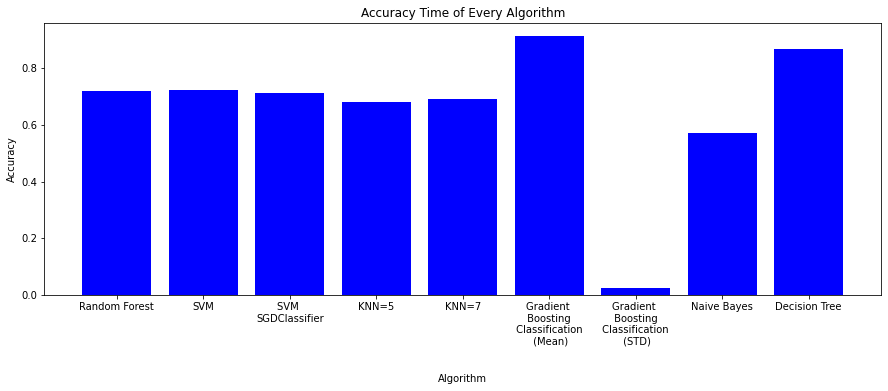

In [143]:
fig = plt.figure(figsize = (15, 5))
# Accuray_List = [rf_time, svm_time, sgdc_time, knn_five_time, knn_seven_time, gb_time_classification, gb_regressor, kmeans_time, nb_time, dt_time]
algo = ['Random Forest', 'SVM', 'SVM \nSGDClassifier', 'KNN=5', 'KNN=7', 'Gradient \n Boosting \n Classification \n (Mean)', 'Gradient \n Boosting \n Classification \n (STD)',  'Naive Bayes', 'Decision Tree']

algo_accuracy = [rf_ac, svm_ac, sgdc_ac, knn_five_ac, knn_seven_ac, gb_time_classification_ac, gb_time_c_std_ac, nb_ac, dt_ac]

plt.bar(algo, algo_accuracy, color ='blue', width=0.8)
 
print(type(knn_five_time))
plt.xlabel("\n\nAlgorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy Time of Every Algorithm")
plt.show()

# Plotting Run Time of every Algorithm (Microseconds)

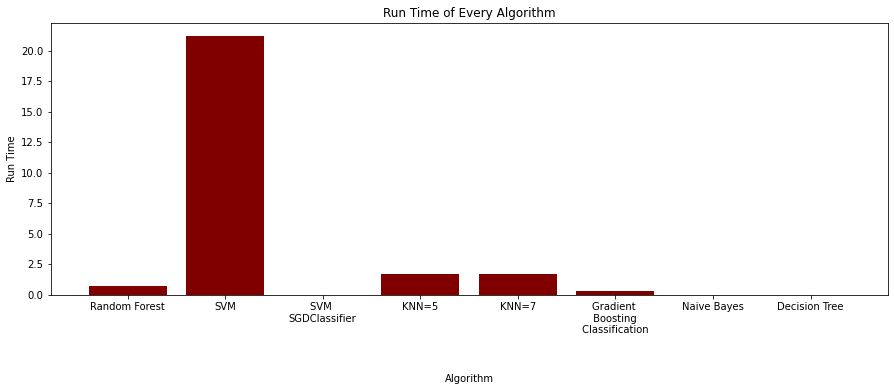

In [145]:
fig = plt.figure(figsize = (15, 5))
algo = ['Random Forest', 'SVM', 'SVM \nSGDClassifier', 'KNN=5', 'KNN=7', 'Gradient \n Boosting \n Classification \n', 'Naive Bayes', 'Decision Tree']

algo_run_time = [rf_run_time, svm_time_run_time, sgdc_time_run_time, knn_five_time_run_time, knn_seven_time_run_time, gb_time_classification_run_time, nb_run_time, dt_run_time]

plt.bar(algo, algo_run_time , color ='maroon', width=0.8)
 

plt.xlabel("\n\nAlgorithm")
plt.ylabel("Run Time")
plt.title("Run Time of Every Algorithm (Seconds)")
plt.show()